In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
df=pd.read_csv("C:/python/TensorFlow_FILES/DATA/fake_reg.csv")

In [3]:
df.head()

,price,feature1,feature2
0,461.527929,999.787558,999.766096
1,548.130011,998.861615,1001.042403
2,410.297162,1000.070267,998.844015
3,540.382220,999.952251,1000.440940
4,546.024553,1000.446011,1000.338531


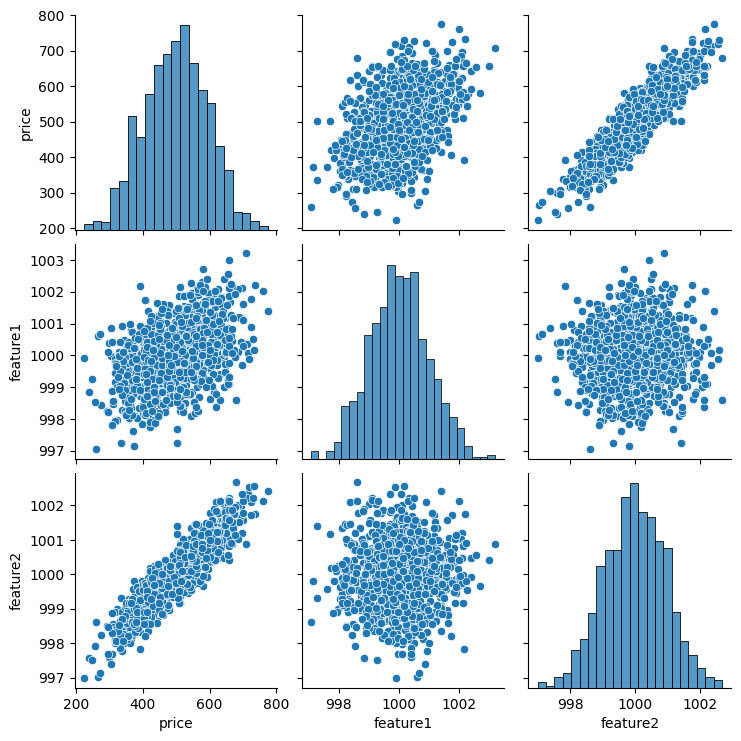

In [4]:
sns.pairplot(df)

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
X=df[["feature1","feature2"]].values

In [7]:
y=df["price"].values

In [8]:
X

array([[ 999.78755752,  999.7660962 ],
       [ 998.86161491, 1001.04240315],
       [1000.07026691,  998.84401463],
       ...,
       [1001.45164617,  998.84760554],
       [1000.77102275,  998.56285086],
       [ 999.2322436 , 1001.45140713]], shape=(1000, 2))

In [9]:
train_test_split

<function sklearn.model_selection._split.train_test_split(*arrays, test_size=None, train_size=None, random_state=None, shuffle=True, stratify=None)>

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [11]:
X_test.shape

(300, 2)

In [12]:
from sklearn.preprocessing import MinMaxScaler

In [13]:
scaler=MinMaxScaler()

In [14]:
scaler.fit(X_train)

,feature_range,"(0, ...)"
,copy,True
,clip,False


In [15]:
X_train=scaler.transform(X_train)

In [16]:
X_test=scaler.transform(X_test)

In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [20]:
model=Sequential()
model.add(Dense(4,activation="relu"))
model.add(Dense(4,activation="relu"))
model.add(Dense(4,activation="relu"))

model.add(Dense(1))
model.compile(optimizer="rmsprop",loss="mse")


In [21]:
model.fit(x=X_train,y=y_train,epochs=250)

Epoch 1/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 256613.9375   
Epoch 2/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 256468.4844 
Epoch 3/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 256314.8281 
Epoch 4/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 256143.5469 
Epoch 5/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 255951.1094 
Epoch 6/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 255732.1562 
Epoch 7/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 255485.0938 
Epoch 8/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 255205.1250 
Epoch 9/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 254894.6719 
Epoch 10/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 254551.2500 
Epoch 11/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 254174.8281 
Epoch 12/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 253765.8125 
Epoch 13/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 253319.8906 
Epoch 14/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss

In [24]:
model.history.history

{'loss': [256613.9375,
  256468.484375,
  256314.828125,
  256143.546875,
  255951.109375,
  255732.15625,
  255485.09375,
  255205.125,
  254894.671875,
  254551.25,
  254174.828125,
  253765.8125,
  253319.890625,
  252828.484375,
  252292.4375,
  251699.109375,
  251044.5,
  250327.203125,
  249545.96875,
  248690.78125,
  247765.34375,
  246759.109375,
  245671.453125,
  244494.0625,
  243225.1875,
  241862.75,
  240400.140625,
  238829.328125,
  237156.734375,
  235373.640625,
  233463.703125,
  231435.25,
  229278.71875,
  227004.6875,
  224583.109375,
  222029.59375,
  219357.671875,
  216512.15625,
  213542.171875,
  210394.359375,
  207113.046875,
  203676.0,
  200079.859375,
  196315.390625,
  192408.109375,
  188346.78125,
  184108.3125,
  179726.78125,
  175163.140625,
  170476.484375,
  165599.015625,
  160601.84375,
  155430.0625,
  150097.3125,
  144701.546875,
  139101.828125,
  133408.3125,
  127574.984375,
  121665.90625,
  115657.109375,
  109577.84375,
  103480.7343

In [25]:
loss_df=pd.DataFrame(model.history.history)

<Axes: >

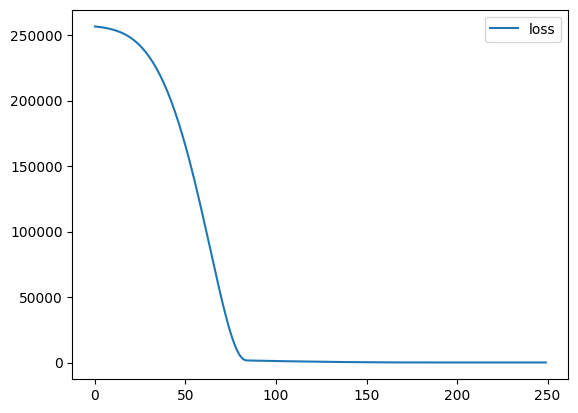

In [27]:
loss_df.plot()

In [28]:
model.evaluate(X_test,y_test,verbose=0)

26.454872131347656

In [29]:
test_predictions=model.predict(X_test)

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 


In [30]:
test_predictions

array([[406.16156],
       [624.92175],
       [593.44696],
       [573.47345],
       [367.36948],
       [580.4534 ],
       [516.1534 ],
       [460.1166 ],
       [550.4393 ],
       [448.50397],
       [613.1412 ],
       [550.1819 ],
       [420.00195],
       [409.74344],
       [652.7186 ],
       [438.25412],
       [509.58914],
       [661.37445],
       [664.0466 ],
       [566.79553],
       [334.9188 ],
       [445.79654],
       [383.33444],
       [379.56625],
       [567.84235],
       [611.9293 ],
       [533.5558 ],
       [428.78778],
       [656.88434],
       [414.98532],
       [443.6066 ],
       [486.18683],
       [439.36606],
       [683.3541 ],
       [425.69415],
       [418.5752 ],
       [503.056  ],
       [551.6894 ],
       [510.8278 ],
       [396.17892],
       [619.96844],
       [417.53537],
       [605.79254],
       [446.94754],
       [503.08682],
       [583.03174],
       [670.51294],
       [491.48517],
       [319.26138],
       [486.48416],


In [33]:
test_predictions=pd.Series(test_predictions.reshape(300,))

In [34]:
test_predictions

0      406.161560
1      624.921753
2      593.446960
3      573.473450
4      367.369476
          ...    
295    530.193420
296    516.414001
297    611.004517
298    417.867584
299    411.749786
Length: 300, dtype: float32

In [35]:
pred_df=pd.DataFrame(y_test,columns=["TEST TRUE Y"])

In [48]:
pred_df=pd.concat([pred_df,test_predictions],axis=1)

In [49]:
pred_df

,TEST TRUE Y,0
0,402.296319,406.161560
1,624.156198,624.921753
2,582.455066,593.446960
3,578.588606,573.473450
4,371.224104,367.369476
...,...,...
295,525.704657,530.193420
296,502.909473,516.414001
297,612.727910,611.004517
298,417.569725,417.867584


In [50]:
pred_df.columns=['test true y','model predictions']

In [51]:
pred_df

,test true y,model predictions
0,402.296319,406.161560
1,624.156198,624.921753
2,582.455066,593.446960
3,578.588606,573.473450
4,371.224104,367.369476
...,...,...
295,525.704657,530.193420
296,502.909473,516.414001
297,612.727910,611.004517
298,417.569725,417.867584


<Axes: xlabel='test true y', ylabel='model predictions'>

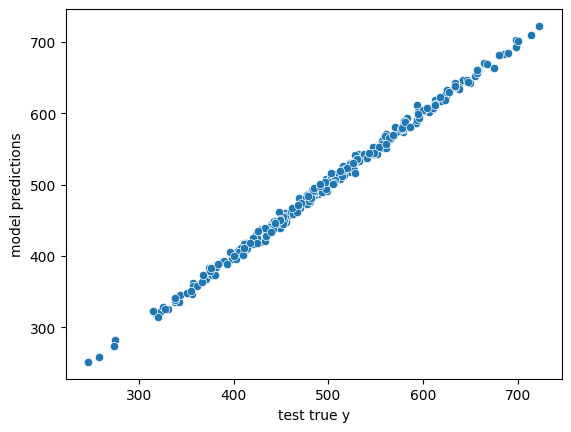

In [52]:
sns.scatterplot(x='test true y',y='model predictions',data=pred_df)

In [53]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [55]:
mean_absolute_error(pred_df['test true y'],pred_df['model predictions'])

4.167427149822295

In [56]:
mean_squared_error(pred_df['test true y'],pred_df['model predictions'])

26.454876550470914

In [58]:
df.describe()

,price,feature1,feature2
count,1000.000000,1000.000000,1000.000000
mean,498.673029,1000.014171,999.979847
std,93.785431,0.974018,0.948330
min,223.346793,997.058347,996.995651
25%,433.025732,999.332068,999.316106
50%,502.382117,1000.009915,1000.002243
75%,564.921588,1000.637580,1000.645380
max,774.407854,1003.207934,1002.666308


In [63]:
new_gem=[[998,1000]]

In [64]:
new_gem

[[998, 1000]]

In [65]:
new_gem=scaler.transform(new_gem)

In [66]:
new_gem

array([[0.14117652, 0.53968792]])

In [67]:
model.predict(new_gem)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


array([[420.5656]], dtype=float32)

In [68]:
from tensorflow.keras.models import load_model

In [70]:
model.save('my_gem_model.keras')

In [72]:
later_model=load_model("my_gem_model.keras")

In [75]:
later_model.predict(X_test)

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


array([[406.16156],
       [624.92175],
       [593.44696],
       [573.47345],
       [367.36948],
       [580.4534 ],
       [516.1534 ],
       [460.1166 ],
       [550.4393 ],
       [448.50397],
       [613.1412 ],
       [550.1819 ],
       [420.00195],
       [409.74344],
       [652.7186 ],
       [438.25412],
       [509.58914],
       [661.37445],
       [664.0466 ],
       [566.79553],
       [334.9188 ],
       [445.79654],
       [383.33444],
       [379.56625],
       [567.84235],
       [611.9293 ],
       [533.5558 ],
       [428.78778],
       [656.88434],
       [414.98532],
       [443.6066 ],
       [486.18683],
       [439.36606],
       [683.3541 ],
       [425.69415],
       [418.5752 ],
       [503.056  ],
       [551.6894 ],
       [510.8278 ],
       [396.17892],
       [619.96844],
       [417.53537],
       [605.79254],
       [446.94754],
       [503.08682],
       [583.03174],
       [670.51294],
       [491.48517],
       [319.26138],
       [486.48416],
